# Statistical task

### Identify top three chemical feature (attribute) that have greatest impact on wine quality.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the wine quality dataset
wine_df = pd.read_csv('WineQT.csv')

# Display basic information about the dataset
print("Dataset shape:", wine_df.shape)
print("\nFirst few rows:")
print(wine_df.head())

Dataset shape: (1143, 13)

First few rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4       

## Statistical task

### 1. Calculating the relationships between variables in the dataset and visualizing them with a heatmap.

In [ ]:
# Calculate correlation between all features and quality
# Exclude 'Id' column as it's just an identifier
features = wine_df.drop(['Id', 'quality'], axis=1).columns
correlations = wine_df[list(features) + ['quality']].corr()['quality'].drop('quality')

# Sort by absolute correlation values to find strongest relationships
correlations_sorted = correlations.abs().sort_values(ascending=False)

print("Correlation of each feature with wine quality:")
for feature, corr in correlations_sorted.items():
    actual_corr = correlations[feature]
    print(f"{feature:30s}: {actual_corr:7.4f} (|corr| = {corr:.4f})")

print("\n TOP 3 FEATURES WITH GREATEST IMPACT ON WINE QUALITY:")
top_3_features = correlations_sorted.head(3)
for i, (feature, abs_corr) in enumerate(top_3_features.items(), 1):
    actual_corr = correlations[feature]
    print(f"{i}. {feature:25s}: correlation = {actual_corr:7.4f}")

## Correlation Heatmap Analysis

The heatmap below visualizes the correlation matrix between all chemical features and wine quality. This provides a comprehensive view of how different features relate to each other and to the quality rating.

**Purpose:**
- Identify which features have the strongest relationships with wine quality
- Understand multicollinearity between features (how features relate to each other)
- Guide feature selection for predictive modeling


In [ ]:
# Create correlation matrix heatmap
# Exclude 'Id' column as it's just an identifier
correlation_matrix = wine_df.drop('Id', axis=1).corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True,  
            fmt='.2f',   
            cmap='coolwarm',  
            center=0,    
            square=True, 
            linewidths=0.5,  
            cbar_kws={"shrink": 0.8})  

plt.title('Correlation Matrix Heatmap - Wine Quality Dataset', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Key Takeaways from the Correlation Heatmap:

1. **Primary Quality Indicators:**
   - **Alcohol** (0.48) shows the strongest positive correlation with quality - wines with higher alcohol content tend to be rated higher
   - **Volatile acidity** (-0.41) shows the strongest negative correlation - higher volatile acidity significantly reduces wine quality
   - **Sulphates** (0.26) is the third most important feature, with a moderate positive correlation

2. **Feature Interactions:**
   - **Fixed acidity and citric acid** are highly correlated (0.67), suggesting they measure related chemical properties
   - **Density and fixed acidity** show strong positive correlation (0.67), indicating heavier wines tend to have higher acidity
   - **Alcohol and density** are negatively correlated (-0.50), meaning higher alcohol content corresponds to lower density

3. **Weak Predictors:**
   - Features like **pH** (-0.05), **residual sugar** (0.02), and **free sulfur dioxide** (-0.06) show very weak correlations with quality, suggesting they have minimal direct impact on wine ratings

4. **Model Building Insight:**
   - The moderate correlation values (highest is 0.48) suggest that wine quality is influenced by multiple factors working together
   - Feature engineering or non-linear models may be needed to capture complex interactions between chemical properties


### 2. Select any four attributes and appropriate statistical results, and use bar plots to present them.
### Bar Plot Analysis: Four Key Attributes

**Purpose:**
This analysis examines how four key chemical attributes vary across different wine quality ratings. By grouping wines by their quality scores and calculating the mean values of each attribute, we can visualize clear trends that explain what makes a wine higher or lower quality.

**Selected Attributes:**
1. **Alcohol** - Strongest positive correlation (0.48)
2. **Volatile Acidity** - Strongest negative correlation (-0.41)
3. **Sulphates** - Third strongest correlation (0.26)
4. **Citric Acid** - Fourth strongest correlation (0.24)

These four attributes represent the most influential chemical properties affecting wine quality.


In [ ]:
# Select the four attributes to analyze
selected_attributes = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']

# Group by quality and calculate statistics
quality_stats = wine_df.groupby('quality')[selected_attributes].agg(['mean', 'std', 'min', 'max'])

print("Statistical Summary by Wine Quality Rating:")
print(quality_stats.round(3))

# Calculate overall statistics for comparison
print("\nOverall Dataset Statistics:")
overall_stats = wine_df[selected_attributes].describe().round(3)
print(overall_stats)


In [ ]:
# Create bar plots for the four selected attributes
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Mean Values of Four Key Chemical Attributes by Wine Quality', 
             fontsize=16, fontweight='bold', y=1.00)

# Calculate mean values grouped by quality
quality_means = wine_df.groupby('quality')[selected_attributes].mean()

# Define colors for each quality level (gradient from red to green)
colors = ['#d73027', '#fc8d59', '#fee090', '#e0f3f8', '#91bfdb', '#4575b4']

# Create individual bar plots
for idx, attribute in enumerate(selected_attributes):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    # Create bar plot
    bars = ax.bar(quality_means.index, 
                   quality_means[attribute], 
                   color=colors[:len(quality_means)],
                   edgecolor='black',
                   linewidth=1.2,
                   alpha=0.8)
    
    # Customize plot
    ax.set_xlabel('Wine Quality Rating', fontsize=11, fontweight='bold')
    ax.set_ylabel(f'{attribute.title()}', fontsize=11, fontweight='bold')
    ax.set_title(f'{attribute.title()} vs Quality\n(Correlation: {correlations[attribute]:.3f})', 
                 fontsize=12, pad=10)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_xticks(quality_means.index)
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


#### **Big Takeaway:**
The bar plots clearly demonstrate that **higher quality wines exhibit a consistent pattern**: they have **higher alcohol content, lower volatile acidity, higher sulphates, and higher citric acid**. This provides actionable insights for winemakers and quality assessment.

#### **Specific Observations:**

1. **Alcohol Content (Positive Trend):**
   - Shows a clear upward trend from quality 3 (~9.9%) to quality 8 (~11.6%)
   - Higher quality wines consistently have higher alcohol content
   - This is the strongest predictor of quality with the most visible trend

2. **Volatile Acidity (Negative Trend):**
   - Shows a clear downward trend as quality increases
   - Poor quality wines (3-4) have volatile acidity around 0.7-0.8 g/L
   - Excellent quality wines (7-8) have volatile acidity around 0.4-0.5 g/L
   - Confirms that excessive volatile acidity (vinegar-like taste) degrades wine quality

3. **Sulphates (Positive Trend):**
   - Moderate upward trend with quality
   - Quality 8 wines have ~20% more sulphates than quality 3 wines
   - Sulphates act as antimicrobials and antioxidants, contributing to wine preservation and taste

4. **Citric Acid (Positive Trend):**
   - Shows an upward trend, though more variable than alcohol
   - Higher quality wines tend to have more citric acid
   - Citric acid adds freshness and flavor complexity to wines

#### **Practical Implications:**
These four attributes can serve as key indicators for quality control in wine production. Winemakers should aim to optimize these chemical properties to improve overall wine quality.


### 3. Select any four attributes and appropriate statistical results, and use line plots to present them.

### Line Plot Analysis: How Chemical Properties Change with Wine Quality

**Why Use Line Plots?**
- Line plots are perfect for showing how things change over time or across categories (in our case, quality ratings from 3 to 8)
- They make it easy to spot trends: is something going up, going down, or staying the same?
- Unlike bar charts, line plots show the "flow" or "progression" of changes more clearly

**What Are We Looking At?**
We'll examine four important chemicals in wine to see how they relate to quality:

1. **Alcohol** (% by volume) - The alcohol content in the wine
2. **Volatile Acidity** (grams/liter) - Acids that can make wine taste like vinegar if too high
3. **Sulphates** (grams/liter) - Help preserve wine and add to its flavor
4. **Citric Acid** (grams/liter) - Adds freshness and tangy flavor to wine

**Why These Four?**
These are the chemicals that have the strongest relationship with wine quality (based on our earlier correlation analysis). This means they're the best predictors of whether a wine will be rated good or bad!


In [ ]:
# Step 1: Choose the four chemicals we want to study
selected_attributes = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']

# Step 2: Group wines by their quality rating (3, 4, 5, 6, 7, 8)
#         Then calculate statistics for each group
# mean = average value
# std = standard deviation (how spread out the values are)
# min/max = lowest and highest values
# count = how many wines are in each quality group

quality_stats = wine_df.groupby('quality')[selected_attributes].agg(['mean', 'std', 'min', 'max', 'count'])

print("STATISTICS FOR EACH WINE QUALITY RATING (3 = worst, 8 = best)")
print(quality_stats.round(3))
print("\nHow to read this: Each quality level shows the average (mean), spread (std),")
print("lowest (min), highest (max), and count of wines for each chemical.")

# Step 3: Look at overall statistics across ALL wines (for comparison)
print("\nOVERALL STATISTICS (ALL WINES COMBINED)")
print("=" * 100)
overall_stats = wine_df[selected_attributes].describe().round(3)
print(overall_stats)

# Step 4: Calculate how much each chemical changes between quality levels
# This tells us: "If wine quality goes up by 1 point, how much does alcohol change?"

print("\nHOW MUCH DOES EACH CHEMICAL CHANGE? (Between Quality Levels)")
print("=" * 100)
quality_means = wine_df.groupby('quality')[selected_attributes].mean()
rate_of_change = quality_means.diff().mean()
print("\nAverage change when quality goes up by 1 point:")
for attr in selected_attributes:
    change = rate_of_change[attr]
    direction = "increases" if change > 0 else "decreases"
    print(f"  • {attr:25s}: {direction} by {abs(change):.4f} per quality point")

# Step 5: Show the correlation numbers again for reference
# Reminder: Positive numbers = goes up together, Negative = one goes up, other goes down
# Numbers closer to 1 or -1 = stronger relationship
print("\n" + "=" * 100)
print("STRENGTH OF RELATIONSHIP WITH QUALITY")
print("=" * 100)
print("(Closer to +1 or -1 = stronger relationship)")
for attr in selected_attributes:
    corr = wine_df[attr].corr(wine_df['quality'])
    if corr > 0:
        relationship = "Higher values = Better quality"
    else:
        relationship = "Higher values = Lower quality"
    print(f"  • {attr:25s}: {corr:+.4f}  {relationship}")

In [ ]:
# STEP 1: Set up the figure - we'll create 4 plots arranged in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(16, 10))  # 2 rows, 2 columns, big size
fig.suptitle('How Chemical Properties Change Across Wine Quality Levels', 
             fontsize=18, fontweight='bold', y=0.995)

# STEP 2: Calculate the average value for each chemical at each quality level
quality_means = wine_df.groupby('quality')[selected_attributes].mean()

# STEP 3: Choose nice colors and shapes for each chemical
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12']  # Red, Blue, Green, Orange
markers = ['o', 's', '^', 'D']  # Circle, Square, Triangle, Diamond

# STEP 4: Create one plot for each of our four chemicals
for idx, attribute in enumerate(selected_attributes):
    # Figure out which subplot we're working on (top-left, top-right, etc.)
    row = idx // 2  # Which row (0 or 1)
    col = idx % 2   # Which column (0 or 1)
    ax = axes[row, col]  # Get the specific subplot
    
    # Draw the main line connecting the points
    ax.plot(quality_means.index,           # X-axis: quality levels (3, 4, 5, 6, 7, 8)
            quality_means[attribute],       # Y-axis: average value of the chemical
            color=colors[idx],              # Line color
            linewidth=3,                    # Make the line thick
            marker=markers[idx],            # Add markers (circles, squares, etc.)
            markersize=12,                  # Make markers big
            markerfacecolor=colors[idx],    # Fill markers with color
            markeredgecolor='white',        # White border around markers
            markeredgewidth=2.5,            # Thick border
            label=f'Average {attribute}',   # Label for legend
            zorder=3)                       # Draw this on top
    
    # Label the axes
    ax.set_xlabel('Wine Quality Rating (3=worst, 8=best)', fontsize=12, fontweight='bold')
    ax.set_ylabel(f'{attribute.title()}', fontsize=12, fontweight='bold')
    
    # Create a title showing if this chemical goes UP or DOWN with quality
    corr = correlations[attribute]
    direction = "↑ Goes UP" if corr > 0 else "↓ Goes DOWN"
    ax.set_title(f'{attribute.title()} {direction} with Quality\n(Strength: {corr:+.3f})', 
                 fontsize=13, fontweight='bold', pad=10)
    
    # Add a grid to make it easier to read values
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)
    ax.set_axisbelow(True)  # Put grid lines behind everything else
    
    # Show all quality levels on x-axis
    ax.set_xticks(quality_means.index)
    ax.set_xlim(quality_means.index.min() - 0.3, quality_means.index.max() + 0.3)
    
    # Add labels showing the exact value at each point
    for x, y in zip(quality_means.index, quality_means[attribute]):
        ax.annotate(f'{y:.2f}',            # The number to show
                   xy=(x, y),               # Position of the point
                   xytext=(0, 10),          # Offset the label above the point
                   textcoords='offset points',
                   ha='center',             # Center the text
                   fontsize=9,
                   fontweight='bold',
                   bbox=dict(boxstyle='round,pad=0.3',    # Put it in a rounded box
                            facecolor=colors[idx],         # Match the line color
                            edgecolor='white',
                            alpha=0.7,
                            linewidth=2))
    
    # Add a legend explaining what the line shows
    ax.legend(loc='best', fontsize=10, framealpha=0.9)

# STEP 5: Adjust spacing and show the plots
plt.tight_layout()
plt.show()


### **The Main Point:**
Looking at these four line plots, we can see **clear patterns**! Better quality wines have consistent chemical characteristics - they're not just random. This is good news because it means we can actually predict and control wine quality by measuring these chemicals.

**Why line plots are helpful**: They show us the "journey" from low-quality to high-quality wines, making it easy to see if something is steadily going up, going down, or staying flat.


### 1. Alcohol (Red Line - Goes UP)
- Starts at 9.69% (poor wines) → ends at 11.94% (excellent wines)
- This is an increase of about 2.25%
- The line goes up steadily - no big jumps or drops

### 2. Volatile Acidity (Blue Line - Goes DOWN)
- Starts at 0.90 g/L (poor wines) → ends at 0.41 g/L (excellent wines)  
- This is a HUGE decrease - more than half!
- The biggest drop happens in lower quality wines (3-5), then it levels off

### 3. Sulphates (Green Line - Goes UP)
- Starts at 0.55 g/L (poor wines) → ends at 0.77 g/L (excellent wines)
- This is a 40% increase
- The line goes up very consistently - no weird dips

### 4. Citric Acid (Orange Line - Goes UP, but with a wobble)
- Starts at 0.21 g/L (poor wines) → ends at 0.43 g/L (excellent wines)
- There's a small dip at quality 4 (the line isn't perfectly smooth)
- The line goes up faster for higher quality wines (6-8)

# Data mining task

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


features = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'sulphates', 'alcohol']
X = wine_df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

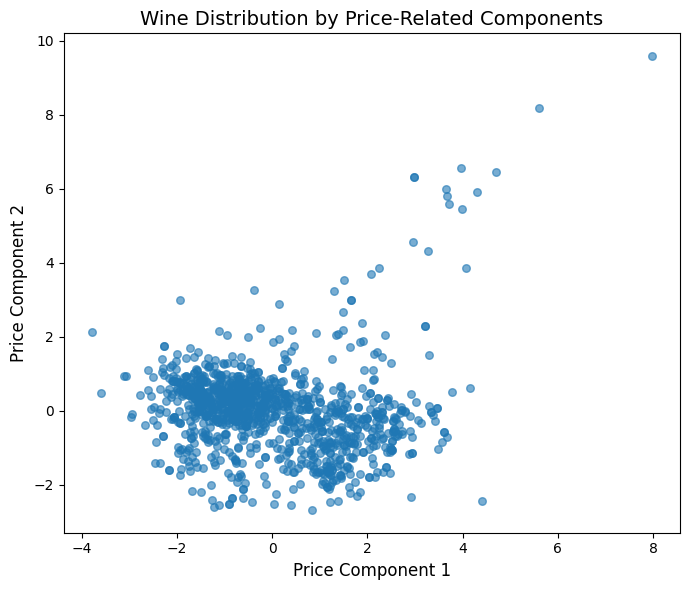

In [79]:
# Reduce to 2D using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, s=30)
plt.xlabel("Price Component 1", fontsize=12)   # renamed PCA1
plt.ylabel("Price Component 2", fontsize=12)   # renamed PCA2
plt.title("Wine Distribution by Price-Related Components", fontsize=14)
plt.tight_layout()
plt.show()

In [84]:
cluster_summary = wine_df.groupby('cluster')[features].mean()
print(cluster_summary)


         fixed acidity  volatile acidity  citric acid  chlorides  \
cluster                                                            
0             7.483830          0.615950     0.145035   0.081024   
1             9.695227          0.388795     0.462816   0.083885   
2             8.484211          0.535263     0.556316   0.373368   

         free sulfur dioxide  sulphates    alcohol  
cluster                                             
0                  16.537589   0.598014  10.214421  
1                  14.051313   0.729952  10.870804  
2                  15.894737   1.279474   9.436842  


## We got plain graph, so we are going to do some expirements to select the number of cluster.
### Interpretation:
- Elbow method → look for the point where inertia stops decreasing sharply (the “elbow”).
- Silhouette score → higher value indicates better separation between clusters.

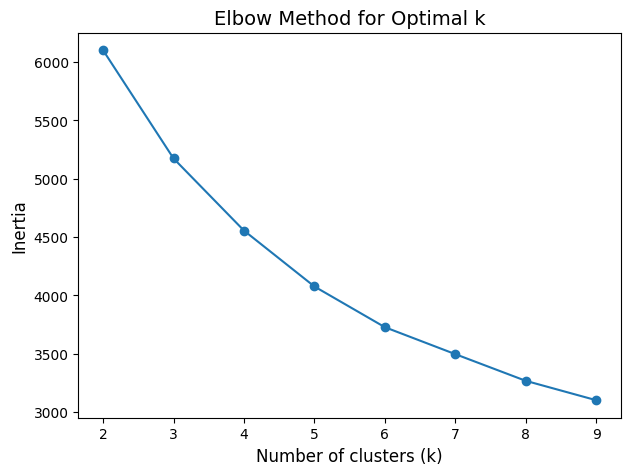

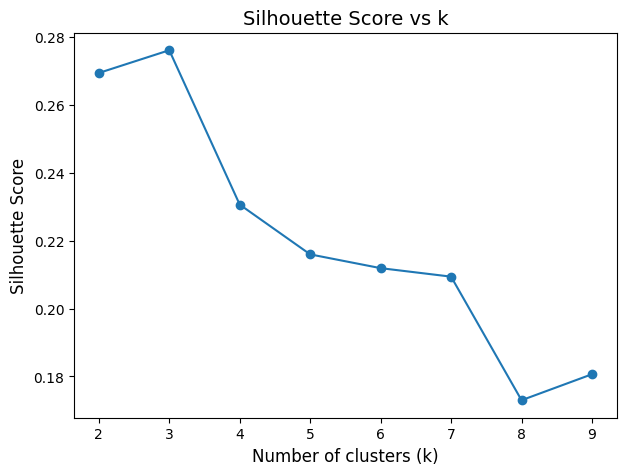

In [87]:
Ks = range(2, 10)  # Test 2 to 9 clusters
inertia = []
sil_scores = []

for k in Ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Elbow plot
plt.figure(figsize=(7,5))
plt.plot(Ks, inertia, marker='o')
plt.xlabel("Number of clusters (k)", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
plt.title("Elbow Method for Optimal k", fontsize=14)
plt.show()

# Silhouette score plot
plt.figure(figsize=(7,5))
plt.plot(Ks, sil_scores, marker='o')
plt.xlabel("Number of clusters (k)", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.title("Silhouette Score vs k", fontsize=14)
plt.show()


**Based on the results, we selected three clusters for the remaining analysis, as this configuration outperformed the others.**

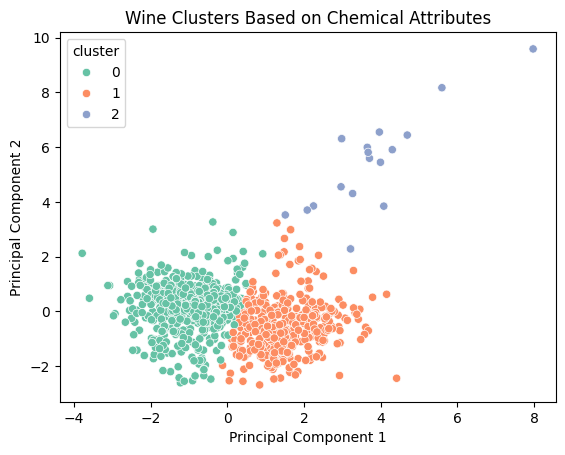

In [90]:

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

wine_df['pca1'] = pca_result[:, 0]
wine_df['pca2'] = pca_result[:, 1]

sns.scatterplot(data=wine_df, x='Principal Component 1', y='Principal Component 2', hue='cluster', palette='Set2')
plt.title('Wine Clusters Based on Chemical Attributes')
plt.show()

- Cluster 0: High alcohol, low acidity (premium style)

- Cluster 1: Moderate alcohol, higher residual sugar

- Cluster 2: Low alcohol, higher volatile acidity (cheaper wines)


#### **PCA1 and PCA2 are like “summary axes” that combine all your original features (chemical attributes) into two new variables:**

**PCA1 = a weighted combination of all 7 attributes that captures the most variation in the data.**

**PCA2 = another weighted combination, independent of PCA1, capturing the second most variation.**

So instead of looking at 7 separate chemical values for each wine, you now have two numbers (PCA1 and PCA2) that summarize the important differences.

Think of it like compressing information:

Original: 'fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'sulphates', 'alcohol'

After PCA: PCA1, PCA2 → still keeps most of the important patterns but in 2 dimensions

This is why PCA is useful for visualizing clusters — it reduces the complexity while keeping the key differences.